In [1]:
# === Patch scikit-learn for faster processing ===
%pip install -q scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()


Note: you may need to restart the kernel to use updated packages.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:

# === Set up project root ===
import sys
from pathlib import Path

project_root = Path().resolve()
while not (project_root / 'src').exists() and project_root != project_root.parent:
    project_root = project_root.parent
sys.path.append(str(project_root))
print("Project root set to:", project_root)


Project root set to: C:\Users\jonat\fraud-detection-project


In [3]:

# === Imports ===
import pandas as pd
import joblib
import numpy as np
from src.training import train_and_evaluate_cv 


In [4]:

# === Paths ===
processed_dir = project_root / "data" / "processed"
model_dir = project_root / "models" / "trained_model"
model_dir.mkdir(parents=True, exist_ok=True)


In [5]:

# === Load Data ===
feature_columns = joblib.load(processed_dir / "feature_columns.pkl")
print("Loaded feature column names:", feature_columns[:5], "...")

X = pd.read_csv(processed_dir / "X_smote.csv", header=0)
X.columns = feature_columns

y = pd.read_csv(processed_dir / "y_smote.csv", header=0).squeeze("columns")
y = pd.to_numeric(y, errors="coerce").dropna().astype(int).reset_index(drop=True)

min_len = min(len(X), len(y))
X = X.iloc[:min_len].reset_index(drop=True)
y = y.iloc[:min_len].reset_index(drop=True)

print("Adjusted shapes for consistency:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Loaded feature column names: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3'] ...
Adjusted shapes for consistency:
X shape: (1139754, 357)
y shape: (1139754,)


In [6]:

# === Load preprocessor ===
preprocessor = joblib.load(processed_dir / "preprocessor.pkl")
print("Preprocessor loaded.")


Preprocessor loaded.



=== Training RandomForest with 5-Fold Cross-Validation ===
Fold 1: RandomForest trained in 239.39 seconds

=== Fold 1 Classification Report for RandomForest ===
              precision    recall  f1-score   support

           0     0.9865    0.9970    0.9917    113934
           1     0.9970    0.9864    0.9916    114017

    accuracy                         0.9917    227951
   macro avg     0.9917    0.9917    0.9917    227951
weighted avg     0.9917    0.9917    0.9917    227951

Fold 2: RandomForest trained in 222.48 seconds

=== Fold 2 Classification Report for RandomForest ===
              precision    recall  f1-score   support

           0     0.9875    0.9970    0.9923    114106
           1     0.9970    0.9874    0.9922    113845

    accuracy                         0.9922    227951
   macro avg     0.9923    0.9922    0.9922    227951
weighted avg     0.9923    0.9922    0.9922    227951

Fold 3: RandomForest trained in 223.70 seconds

=== Fold 3 Classification Report f

c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: XGBoost trained in 48.09 seconds

=== Fold 1 Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0     0.9710    0.9963    0.9835    113934
           1     0.9962    0.9703    0.9831    114017

    accuracy                         0.9833    227951
   macro avg     0.9836    0.9833    0.9833    227951
weighted avg     0.9836    0.9833    0.9833    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: XGBoost trained in 46.18 seconds

=== Fold 2 Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0     0.9707    0.9959    0.9831    114106
           1     0.9958    0.9698    0.9826    113845

    accuracy                         0.9829    227951
   macro avg     0.9832    0.9829    0.9829    227951
weighted avg     0.9832    0.9829    0.9829    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: XGBoost trained in 47.18 seconds

=== Fold 3 Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0     0.9709    0.9963    0.9834    114031
           1     0.9962    0.9701    0.9830    113920

    accuracy                         0.9832    227951
   macro avg     0.9835    0.9832    0.9832    227951
weighted avg     0.9835    0.9832    0.9832    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: XGBoost trained in 45.68 seconds

=== Fold 4 Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0     0.9702    0.9958    0.9828    113819
           1     0.9957    0.9695    0.9824    114132

    accuracy                         0.9826    227951
   macro avg     0.9830    0.9827    0.9826    227951
weighted avg     0.9830    0.9826    0.9826    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: XGBoost trained in 45.34 seconds

=== Fold 5 Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0     0.9713    0.9958    0.9834    113987
           1     0.9956    0.9706    0.9830    113963

    accuracy                         0.9832    227950
   macro avg     0.9835    0.9832    0.9832    227950
weighted avg     0.9835    0.9832    0.9832    227950



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:23:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



>>> XGBoost - Mean Accuracy: 0.9830 | Mean ROC AUC: 0.9970

=== Training LogisticRegression with 5-Fold Cross-Validation ===
Fold 1: LogisticRegression trained in 1584.87 seconds

=== Fold 1 Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

           0     0.7640    0.8242    0.7930    113934
           1     0.8093    0.7456    0.7762    114017

    accuracy                         0.7849    227951
   macro avg     0.7867    0.7849    0.7846    227951
weighted avg     0.7867    0.7849    0.7846    227951

Fold 2: LogisticRegression trained in 1561.24 seconds

=== Fold 2 Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

           0     0.7628    0.8240    0.7922    114106
           1     0.8082    0.7432    0.7743    113845

    accuracy                         0.7837    227951
   macro avg     0.7855    0.7836    0.7833    227951
weighted avg     0.7855    0.7837    0.7833  

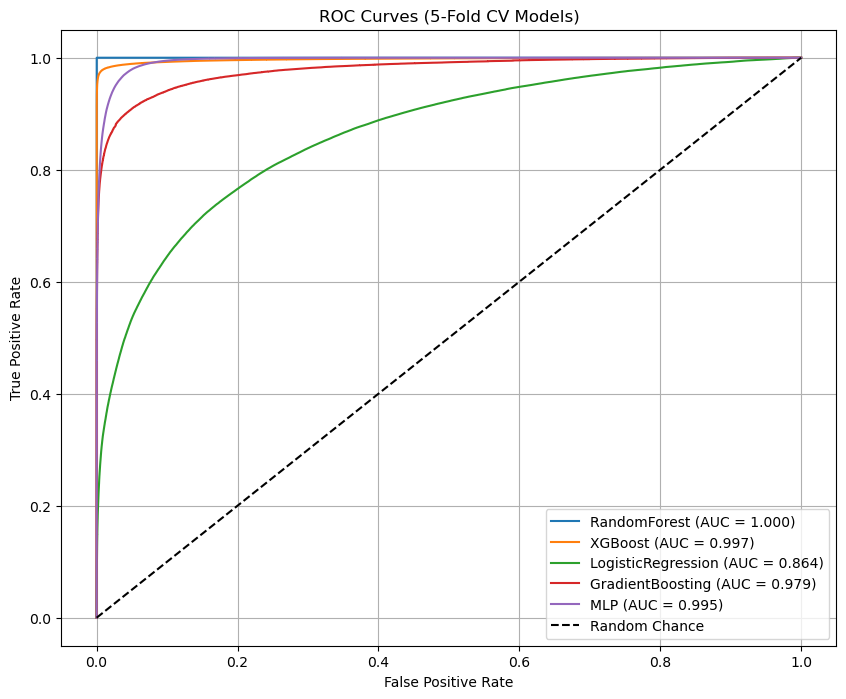


All models, preprocessor, and classification reports saved.


In [7]:

# === Train and Evaluate with Cross-Validation ===
train_and_evaluate_cv(X, y, preprocessor, model_dir, n_splits=5)
